In [ ]:
# Import all necessary libraries for data handling, visualization, preprocessing, model building, and evaluation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load's the EV dataset and drop unique identifier columns that aren't useful for prediction.
msrp_df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
msrp_df = msrp_df.drop(columns=['VIN (1-10)', 'DOL Vehicle ID'], errors='ignore')

In [ ]:
# Display the number of missing values in each column of the dataset.
print("Missing values in each column:\n")
print(msrp_df.isnull().sum())

Missing values in each column:

County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [75]:
# Replace 0 MSRP values with NaN, drop rows with missing MSRP or other values, and preview the cleaned data.
msrp_df['Base MSRP'] = df['Base MSRP'].replace(0, np.nan)
msrp_df = msrp_df.dropna(subset=['Base MSRP'])  
msrp_df = msrp_df.dropna()
msrp_df.head(10)  

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle Location,Electric Utility,2020 Census Tract
6,Thurston,Lacey,WA,98503.0,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,55700.0,22.0,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
16,Kitsap,Poulsbo,WA,98370.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,23.0,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
24,Kitsap,Poulsbo,WA,98370.0,2018,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,45600.0,23.0,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
51,Snohomish,Stanwood,WA,98292.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,10.0,POINT (-122.37265 48.24159),PUGET SOUND ENERGY INC,5.306105e+10
88,Thurston,Olympia,WA,98501.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,22.0,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
126,Thurston,Tumwater,WA,98512.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.0,22.0,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10
132,Yakima,Yakima,WA,98901.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,15.0,POINT (-120.50723 46.60452),PACIFICORP,5.307700e+10
135,Thurston,Olympia,WA,98506.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,22.0,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
174,Grant,Othello,WA,99344.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,13.0,POINT (-119.1742 46.82616),PUD NO 2 OF GRANT COUNTY,5.302501e+10
183,Thurston,Yelm,WA,98597.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,20.0,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
# Check again for any remaining missing values in each column after cleaning.
print("Missing values in each column:\n")
print(msrp_df.isnull().sum())

Missing values in each column:

County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [ ]:
# Display the dataset's structure, including column names, non-null counts, and data types.
msrp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3247 entries, 6 to 223982
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             3247 non-null   object 
 1   City                                               3247 non-null   object 
 2   State                                              3247 non-null   object 
 3   Postal Code                                        3247 non-null   float64
 4   Model Year                                         3247 non-null   int64  
 5   Make                                               3247 non-null   object 
 6   Model                                              3247 non-null   object 
 7   Electric Vehicle Type                              3247 non-null   object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  3247 non-null   object 
 9   Electric Ra

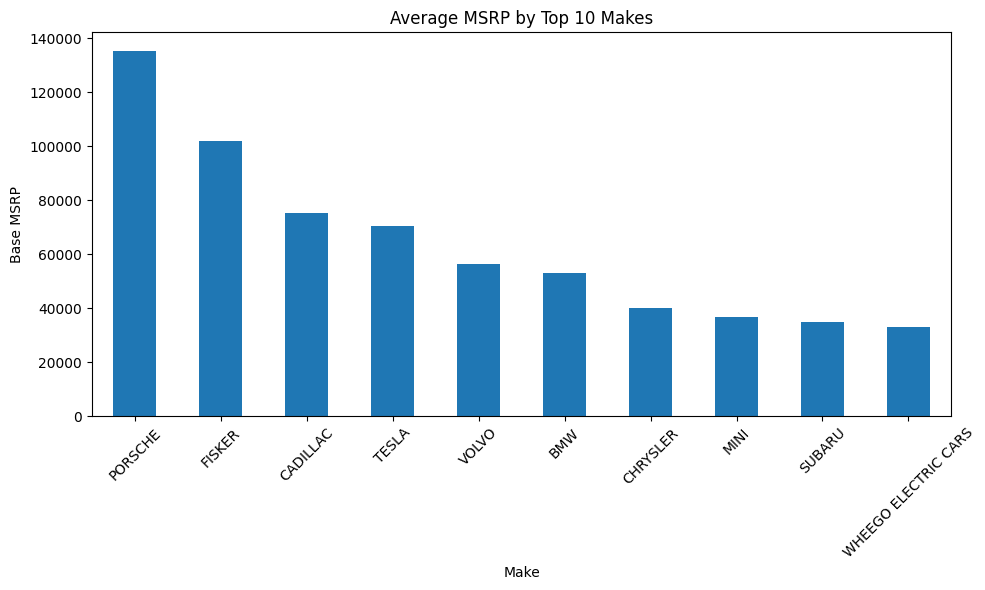

In [ ]:
# Plot the top 10 EV manufacturers based on their average MSRP to visualize the most expensive brands.
plt.figure(figsize=(10, 6))
msrp_df.groupby('Make')['Base MSRP'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average MSRP by Top 10 Makes')
plt.ylabel('Base MSRP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

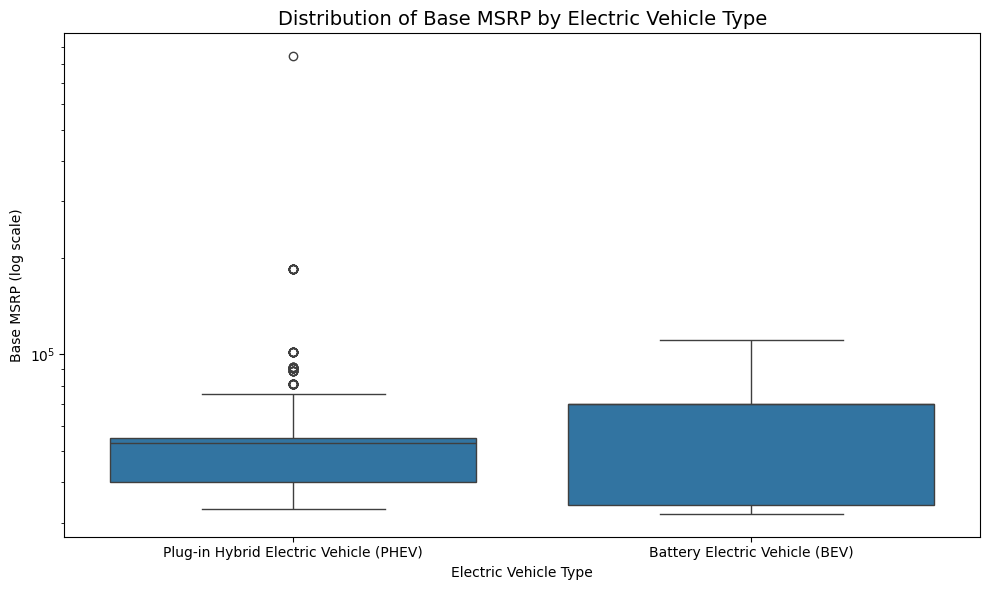

In [ ]:
# Use a log-scaled boxplot to compare MSRP distributions between PHEVs and BEVs and highlight pricing outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=msrp_df)
plt.title('Distribution of Base MSRP by Electric Vehicle Type', fontsize=14)
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP (log scale)')
plt.yscale('log')  
plt.tight_layout()
plt.show()


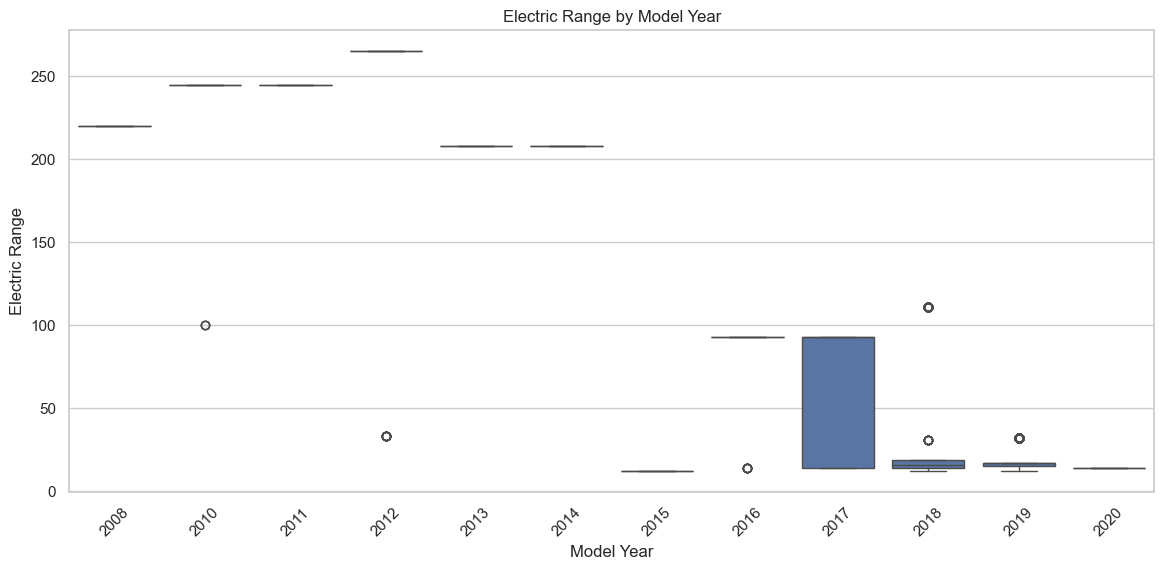

In [76]:
# Visualize how electric vehicle range has varied across model years using a boxplot.

plt.figure(figsize=(14, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=msrp_df)
plt.title('Electric Range by Model Year')
plt.xticks(rotation=45)
plt.show()

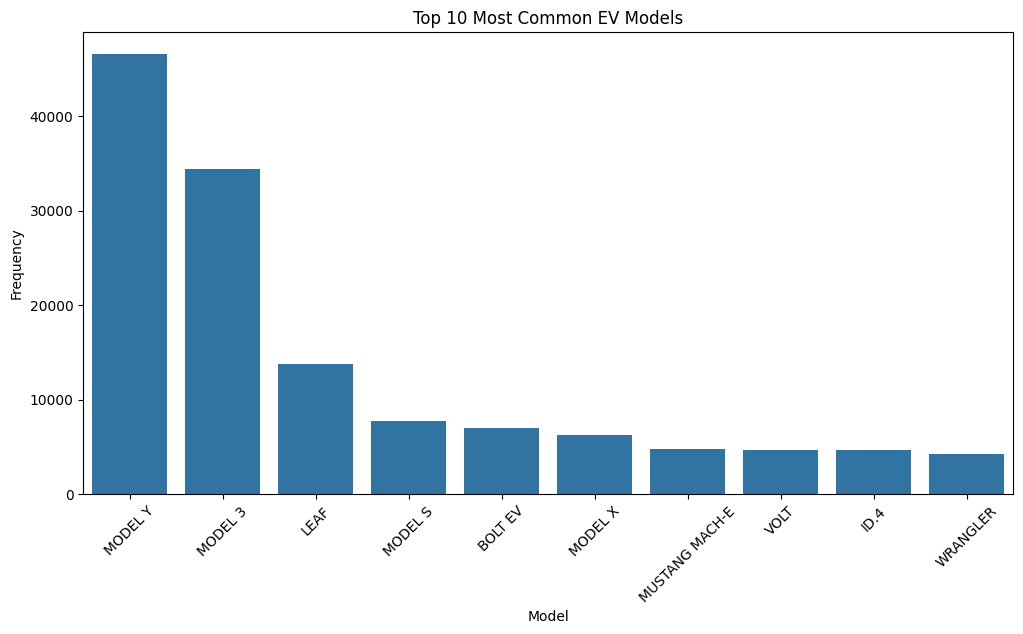

In [ ]:
# Plot the top 10 most frequently occurring EV models to understand which ones dominate the dataset.

top_models = df['Model'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Top 10 Most Common EV Models')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

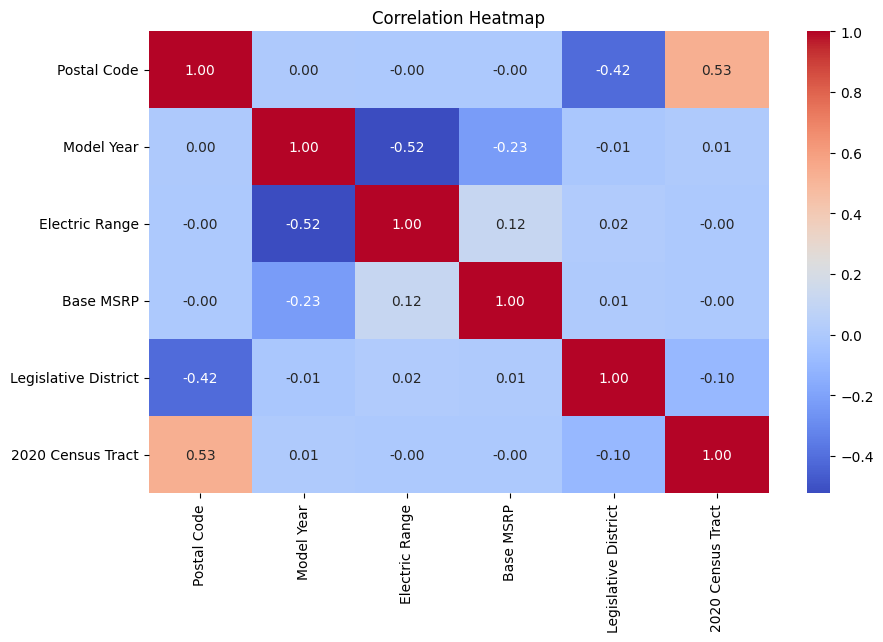

In [ ]:
# Visualize the pairwise correlations between numeric features to identify linear relationships in the data.

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Separate the target variable (Base MSRP) from the input features.

X = msrp_df.drop(columns=['Base MSRP'])
y = msrp_df['Base MSRP']

In [ ]:
# Identify categorical and numerical features, then split the data into training and testing sets.

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define a column transformer to scale numeric features and one-hot encode categorical ones.

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [ ]:
# Define a function to evaluate model performance using metrics and visualizations like scatter and residual plots.

def evaluate_show_plot(y_true, y_pred, title="Model Evaluation"):

    print(f"{title} Evaluation Metrics:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  
    print("RMSE:", rmse)

    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted: {title}')
    plt.tight_layout()
    plt.show()

    residuals = y_true - y_pred
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f'Residuals Distribution: {title}')
    plt.xlabel('Prediction Error')
    plt.tight_layout()
    plt.show()

In [ ]:
# Define a helper function to store model evaluation metrics like R², MAE, and RMSE for comparison.

results_msrp = []  # msrp = Manufacturer’s Suggested Retail Price
results_range = []

def store_results(target_list, name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    target_list.append({

        "Model": name,
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": rmse
    })

In [ ]:
# Build and tune a Lasso regression model using a pipeline and grid search, then display its learned coefficients.

lasso_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=5000))
])
lasso_param_grid = {'regressor__alpha': [0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
print("Lasso Coefficients:", lasso_grid.best_estimator_.named_steps['regressor'].coef_)

Lasso Coefficients: [-1.29538870e+00  3.15445011e+03 -1.12493193e+04 -2.08684424e+01
 -1.26363652e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  7.64282094e+00 -0.00000000e+00
  0.00000000e+00  7.22191485e+00 -3.37517170e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.05859466e+00 -0.00000000e+00
 -0.00000000e+00  2.31241148e+02 -2.46145171e+02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -9.42249517e-01
 -9.72916659e+00 -2.66864542e+01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  6.34794168e+01  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -5.13159587e+01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.81341537e+01
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.0

In [ ]:
# Train and tune a Ridge regression model using grid search, then print its coefficients to observe regularization effects.

ridge_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
ridge_param_grid = {'regressor__alpha': [0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
print("Ridge Coefficients:", ridge_grid.best_estimator_.named_steps['regressor'].coef_)


Ridge Coefficients: [-4.59112160e+02  2.45411138e+03 -1.25303218e+04  4.12707793e+01
  3.54598170e+01 -1.30924709e+02  3.13730700e+02  4.50528413e+02
  2.17439388e+02 -1.13497424e+03  1.59623176e+02 -4.20218945e+01
  2.15538322e+02  2.87752308e+02  1.41234960e+02  1.58191880e+02
 -3.13558030e+02  5.35590788e+02 -6.13383320e+02 -3.12663133e+02
 -3.39374252e+01  4.70274992e+02 -4.17070437e+02  2.75891866e+02
 -2.21636118e+02 -1.68449794e+01  2.21658388e+02 -3.29827348e+02
 -3.75156568e+02 -4.32765901e+02  6.96927803e+01  4.86439137e+02
 -1.03310630e+02  8.75155052e+01  5.18438051e+01  7.96460834e+00
  4.45364390e+02 -3.74091154e+02  2.23112221e+02  3.27782549e+01
  9.18299050e+01  2.50236031e+02 -2.30152978e+02  1.95891252e+02
 -1.58108308e+02 -2.99069568e+02 -2.15257712e+02 -4.49212857e+02
  6.80398805e+01 -6.21823363e+01 -1.38127183e+02 -2.16590175e+02
 -1.49209903e+02 -2.88913655e+03 -1.34715327e+01 -3.17637416e+03
 -7.07652258e+01 -9.48916583e+01 -2.72944207e+02 -5.18064806e+02
 -1.8

In [ ]:
# Train an SVR model with grid search to find the best kernel, C, and epsilon, then evaluate its R² score.

svr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

svr_param_grid = {
    'regressor__C': [1, 10],
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__epsilon': [0.1, 0.2]
}

svr_grid = GridSearchCV(svr_pipe, svr_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
svr_grid.fit(X_train, y_train)
y_pred = svr_grid.predict(X_test)
print("Best SVR Parameters:", svr_grid.best_params_)
print("SVR R² Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best SVR Parameters: {'regressor__C': 10, 'regressor__epsilon': 0.2, 'regressor__kernel': 'linear'}
SVR R² Score: 0.6229667060688172


In [ ]:
# Train and tune a Decision Tree Regressor using

decision_tree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
decision_tree_param_grid = {'regressor__max_depth': [5, 10, 20]}
decision_tree_grid = GridSearchCV(decision_tree_pipe, decision_tree_param_grid, cv=5, scoring='r2')
decision_tree_grid.fit(X_train, y_train)
y_pred = decision_tree_grid.predict(X_test)

print("Best Decision Tree Parameters:", decision_tree_grid.best_params_)
print("Decision Tree R² Score:", r2_score(y_test, y_pred))

Best Decision Tree Parameters: {'regressor__max_depth': 20}
Decision Tree R² Score: 1.0


In [ ]:
# Refit all grid-searched models on the training data to finalize them for evaluation and comparison.

lasso_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)
svr_grid.fit(X_train, y_train)
decision_tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Postal '
                                                                          'Code',
                                                                          'Model '
                                                                          'Year',
                                                                          'Electric '
                                                                          'Range',
                                                                          'Legislative '
                                                                          'District',
                                                                          '2020 '
                                                                          'Census '
                                                                          'Tract']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['County',
                                                                          'City',
                                                                          'State',
                                                                          'Make',
                                                                          'Model',
                                                                          'Electric '
                                                                          'Vehicle '
                                                                          'Type',
                                                                          'Clean '
                                                                          'Alternative '
                                                                          'Fuel '
                                                                          'Vehicle '
                                                                          '(CAFV) '
                                                                          'Eligibility',
                                                                          'Vehicle '
                                                                          'Location',
                                                                          'Electric '
                                                                          'Utility'])])),
                                       ('regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [5, 10, 20]}, scoring='r2')

In [ ]:
# Display a summary table of each model’s best cross-validation R² score and the corresponding optimal hyperparameters.

results_gridsearch = {
    'Lasso (GridSearch)': (lasso_grid.best_score_, lasso_grid.best_params_),
    'Ridge (GridSearch)': (ridge_grid.best_score_, ridge_grid.best_params_),
    'SVR (GridSearch)': (svr_grid.best_score_, svr_grid.best_params_),
    'Decision Tree (GridSearch)': (decision_tree_grid.best_score_, decision_tree_grid.best_params_),
}

pd.DataFrame([
    {"Model": model, "Best R2 Score (CV)": score, "Best Params": params}
    for model, (score, params) in results_gridsearch.items()
])

,Model,Best R2 Score (CV),Best Params
0,Lasso (GridSearch),0.848056,{'regressor__alpha': 1}
1,Ridge (GridSearch),0.859441,{'regressor__alpha': 0.1}
2,SVR (GridSearch),0.396954,"{'regressor__C': 10, 'regressor__epsilon': 0.2..."
3,Decision Tree (GridSearch),0.861173,{'regressor__max_depth': 20}


Fitting 5 folds for each of 8 candidates, totalling 40 fits


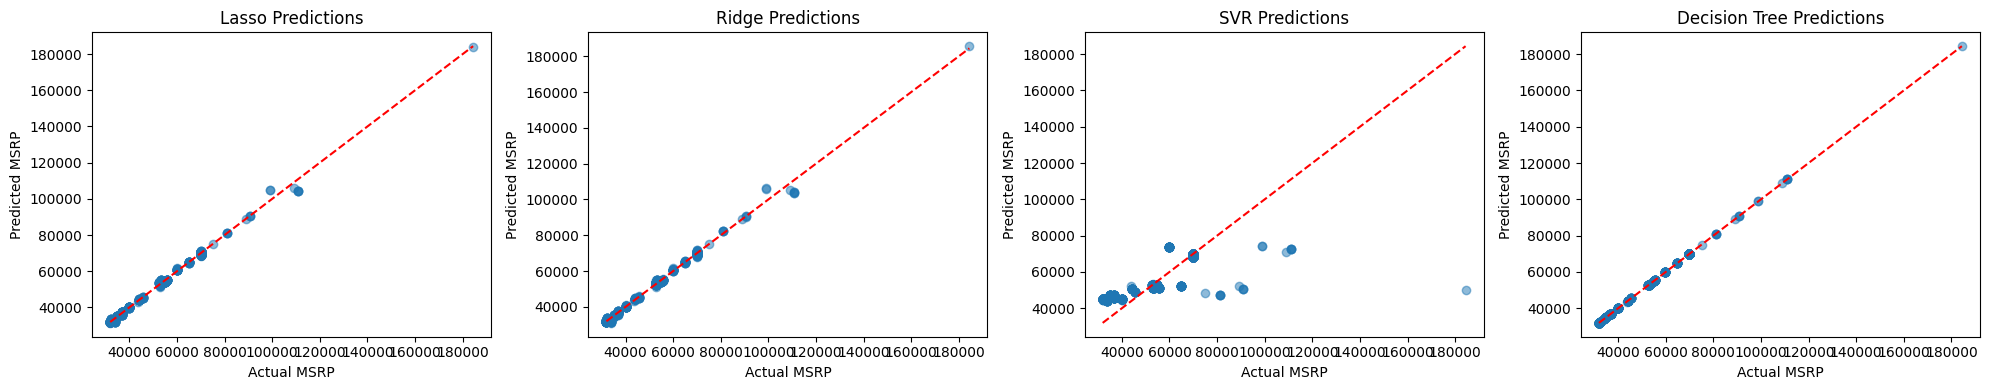

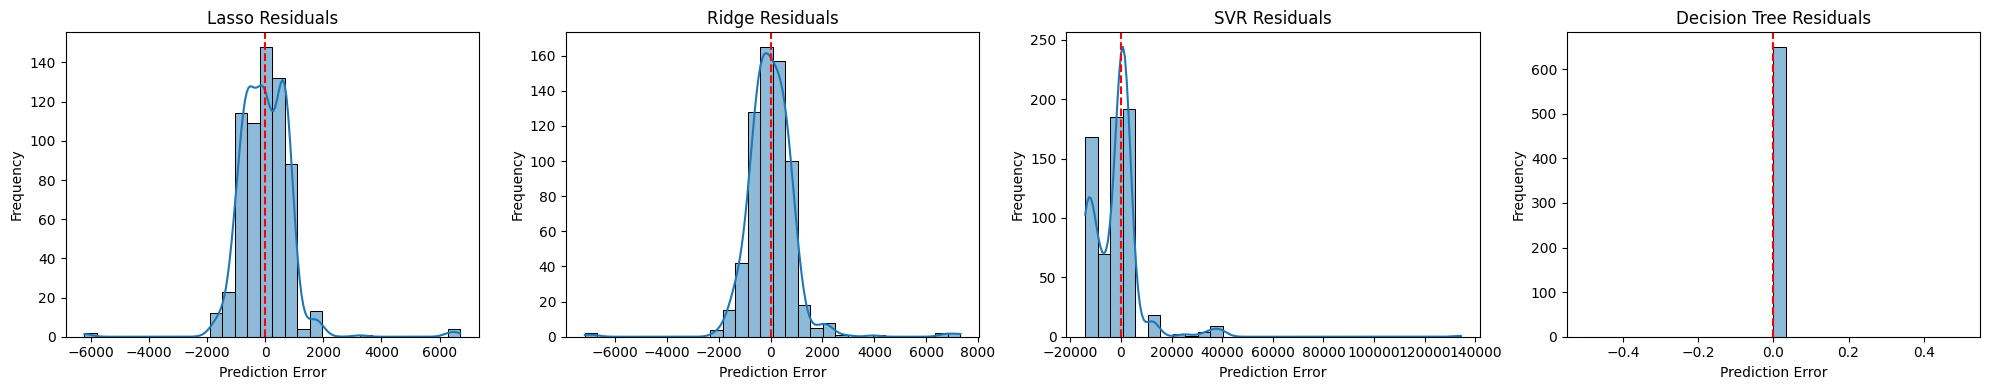


 Model Evaluation Summary:


,Best Params,R2 Score,MAE,MSE,Best Score (CV)
Lasso,{'regressor__alpha': 1},0.997078,628.06636,859392.581297,0.848056
Ridge,{'regressor__alpha': 0.1},0.996664,627.614534,981026.666458,0.859441
SVR,"{'regressor__C': 10, 'regressor__epsilon': 0.2...",0.622967,6008.895834,110890119.455849,0.396954
Decision Tree,{'regressor__max_depth': 20},1.0,0.0,0.0,0.861173


In [ ]:
# Fit each regression model, make predictions, and store evaluation metrics and results in a dictionary.

regression_models = {
    'Lasso': lasso_grid,
    'Ridge': ridge_grid,
    'SVR': svr_grid,
    'Decision Tree': decision_tree_grid
}

results = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Best Params': model.best_params_,
        'R2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'Best Score (CV)': model.best_score_,
        'Predictions': y_pred
    }

# Plot actual vs predicted MSRP values for each model to visualize prediction accuracy.

fig, axes = plt.subplots(1, len(results), figsize=(20, 4))
for ax, (name, result) in zip(axes, results.items()):
    y_pred = result["Predictions"]
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f"{name} Predictions")
    ax.set_xlabel("Actual MSRP")
    ax.set_ylabel("Predicted MSRP")

plt.tight_layout()
plt.show()

# Plot the distribution of prediction errors (residuals) for each model to check for bias or spread.

fig, axes = plt.subplots(1, len(results), figsize=(20, 4))
for ax, (name, result) in zip(axes, results.items()):
    y_pred = result["Predictions"]
    errors = y_test - y_pred
    sns.histplot(errors, bins=30, kde=True, ax=ax)
    ax.axvline(0, color='red', linestyle='--')
    ax.set_title(f"{name} Residuals")
    ax.set_xlabel("Prediction Error")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Display a final summary DataFrame of all model performances and best parameters.

summary_df = pd.DataFrame(results).T.drop(columns='Predictions')
print("\n Model Evaluation Summary:")
display(summary_df)


In [ ]:
# Train the given model pipeline and generate predictions on the test data.

def evaluate_and_plot_model(model_pipeline, name, X_train, X_test, y_train, y_test, result_list, show_coeffs=False, show_importances=False, top_n=20):
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    store_results(result_list, name, y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n{name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    if show_coeffs:
        try:
            coefs = model_pipeline.named_steps['regressor'].coef_
            print(f"\n{name} Coefficients:\n", coefs)
        except AttributeError:
            print(f"\n{name} has no accessible coefficients.")

    if show_importances:
        try:
            importances = model_pipeline.named_steps['regressor'].feature_importances_
            try:
                features = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
            except:
                features = [f"Feature {i}" for i in range(len(importances))]

            feature_series = pd.Series(importances, index=features)
            top_features = feature_series.sort_values(ascending=False).head(top_n)

            plt.figure(figsize=(10, 6))
            top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
            plt.xlabel("Feature Importance")
            plt.title(f"Top {top_n} Important Features - {name}")
            plt.grid(axis='x')
            plt.tight_layout()
            plt.show()

        except AttributeError:
            print(f"\n{name} does not support feature importances.")

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].scatter(y_test, y_pred, alpha=0.5)
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[0].set_title(f"{name}: Actual vs Predicted")
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predicted")

    residuals = y_test - y_pred
    sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')
    axes[1].set_title(f"{name}: Residuals")
    axes[1].set_xlabel("Prediction Error")
    axes[1].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    return model_pipeline, y_pred



Linear Regression Evaluation Metrics:
R² Score: 0.9966
MAE: 696.75
RMSE: 993.61

Linear Regression Coefficients:
 [ 1.45912892e+01  3.41659137e+03 -1.11837516e+04  4.33833181e+01
  8.51347829e+01 -3.48200899e+02 -3.90479632e+01  9.04919139e+00
  2.06450552e+02 -8.28646399e+02  2.83850893e+02  4.08534157e+00
  2.16943336e+02  1.21564923e+02 -6.69937449e+01  6.17930316e+02
  7.65067741e+01  6.56666819e+02 -3.07869378e+02  5.07526152e+01
 -1.29522072e+02  4.73434547e+02 -5.99473598e+02  1.12787570e+02
 -4.56148422e+02 -1.66848080e+02  1.73913265e+02 -3.12410584e+02
 -7.39681374e+01 -8.05894210e+01  1.37152732e+02  6.82032741e+02
 -6.02833417e+02 -8.35415857e+01  1.08923222e+02  5.65309555e+01
  7.54007917e+01 -5.41030961e+00  8.67586501e+01 -4.92312246e+01
 -2.73780055e+02  2.00228226e+02 -3.33019975e+02  4.61832342e+02
 -1.16255616e+02 -1.00940849e+01 -2.56227824e+02 -3.31516851e+02
 -1.87011523e+02  3.70024595e+02  7.14364598e+01 -2.03438026e+02
 -7.40577593e+01 -7.54220288e+02  2.7030

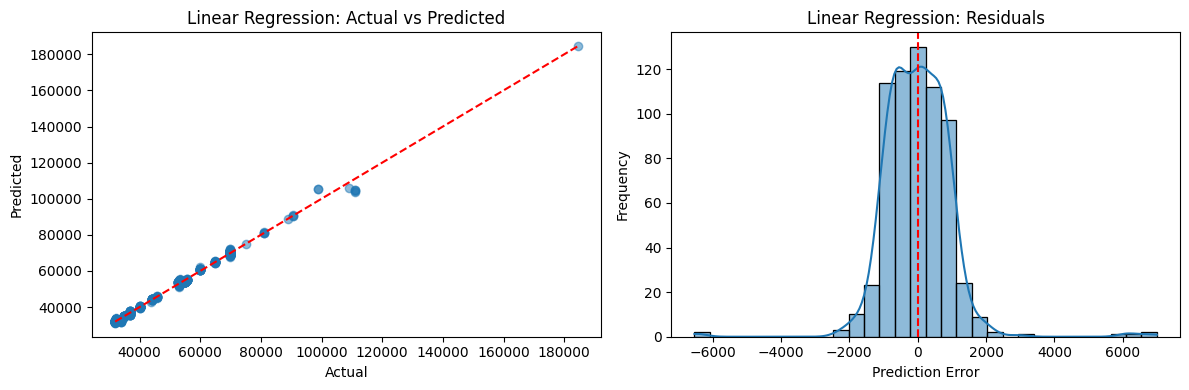

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Postal Code', 'Model Year',
                                                    'Electric Range',
                                                    'Legislative District',
                                                    '2020 Census Tract']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['County', 'City', 'State',
                                                    'Make', 'Model',
                                                    'Electric Vehicle Type',
                                                    'Clean Alternative Fuel '
                                                    'Vehicle (CAFV) Eligibility',
                                                    'V

In [ ]:
# Train a Linear Regression model using a pipeline and evaluate its performance with metrics and coefficient display.

linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
evaluate_and_plot_model(linear_model, "Linear Regression", X_train, X_test, y_train, y_test, results_msrp, show_coeffs=True)


Lasso Regression Evaluation Metrics:
R² Score: 0.9968
MAE: 683.23
RMSE: 976.20

Lasso Regression Coefficients:
 [-0.00000000e+00  3.38257293e+03 -1.12354611e+04  1.12659559e+01
  8.03448794e+01 -5.73061990e+02 -0.00000000e+00 -0.00000000e+00
  3.01962688e+02 -2.17011366e+02  8.70591927e+01 -5.10388432e+01
  3.18779429e+02  3.53423180e+02 -1.39633637e+01  2.61931689e+00
  4.25487544e+01  7.53085443e+02 -1.41780448e+02  0.00000000e+00
 -5.56305970e+01  5.63763638e+02 -4.61534730e+02  6.00130267e+02
 -0.00000000e+00 -3.01882175e+02  0.00000000e+00 -1.53814304e+02
 -5.89172489e-01 -2.18907459e+01  1.33542679e+02  6.61206105e+00
 -8.47372183e+01 -0.00000000e+00  6.10072721e+01  1.13559031e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.47953350e+02  0.00000000e+00 -3.35945509e+02  5.09474984e-01
 -2.83202654e+01 -4.92003898e+01 -2.56990485e+01 -0.00000000e+00
 -2.88354215e+01  1.12275493e+02  4.58481167e+00 -2.20837160e+01
 -4.64266203e+01 -4.26662240e+02 -0.000000

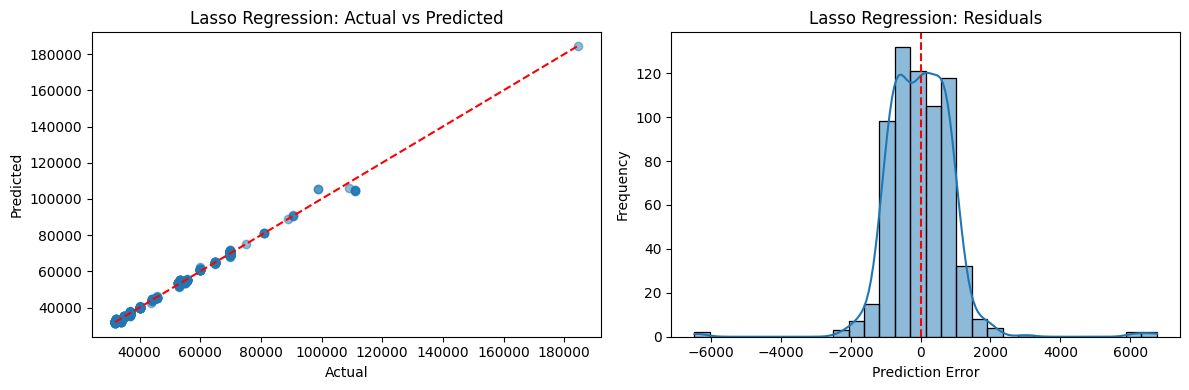

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Postal Code', 'Model Year',
                                                    'Electric Range',
                                                    'Legislative District',
                                                    '2020 Census Tract']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['County', 'City', 'State',
                                                    'Make', 'Model',
                                                    'Electric Vehicle Type',
                                                    'Clean Alternative Fuel '
                                                    'Vehicle (CAFV) Eligibility',
                                                    'V

In [ ]:
# Train and evaluate a Lasso Regression model with coefficient display to observe feature shrinkage.

lasso_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))
])
evaluate_and_plot_model(lasso_regression_model, "Lasso Regression", X_train, X_test, y_train, y_test, results_msrp, show_coeffs=True)


Ridge Regression Evaluation Metrics:
R² Score: 0.9908
MAE: 927.29
RMSE: 1643.81

Ridge Regression Coefficients:
 [-8.79970535e+02 -1.92933363e+03 -1.58381759e+04  1.76547146e+02
 -1.70967099e+02  1.74677688e+02  5.74336299e+02  5.25973761e+02
  7.45794775e+01 -1.28613198e+03 -5.61785517e+01 -7.66483298e+01
  2.04772183e+01  2.14013043e+02  4.50266573e+02 -2.28411727e+02
 -5.12902961e+02  2.81737646e+02  4.59376833e+02 -7.78731743e+02
 -2.25386552e+01  6.12598622e+02 -2.95004407e+02  2.57280384e+02
 -1.61068642e+02  2.73148513e+02  3.51596068e+02 -5.95359405e+02
 -7.76911958e+02 -7.55081468e+02 -8.45626390e+01  1.14238764e-02
  7.84792801e+02  1.03047522e+02 -5.20374026e+01 -4.34323575e+01
  7.56352287e+02 -6.23011022e+02  2.89391797e+02  1.44355293e+02
  4.78591992e+02  2.67038488e+02 -9.40934932e+02  2.91243732e+01
 -1.16944079e+02  7.58437013e+01  7.78631069e+01 -1.31502823e+02
  4.21709142e+02 -1.58986519e+03 -3.26279771e+02 -5.20771804e+02
 -3.21326897e+02 -8.69689405e+03 -1.09689

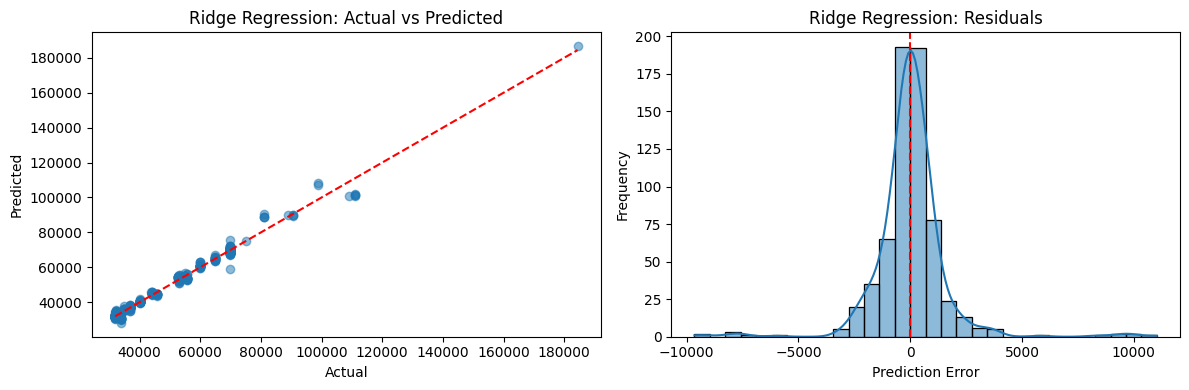

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Postal Code', 'Model Year',
                                                    'Electric Range',
                                                    'Legislative District',
                                                    '2020 Census Tract']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['County', 'City', 'State',
                                                    'Make', 'Model',
                                                    'Electric Vehicle Type',
                                                    'Clean Alternative Fuel '
                                                    'Vehicle (CAFV) Eligibility',
                                                    'V

In [ ]:
# Train and evaluate a Ridge Regression model and display its coefficients to assess regularization impact.

ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

evaluate_and_plot_model(
    model_pipeline=ridge_model,
    name="Ridge Regression",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    result_list=results_msrp,
    show_coeffs=True
)


Decision Tree Evaluation Metrics:
R² Score: 0.9992
MAE: 209.98
RMSE: 499.11


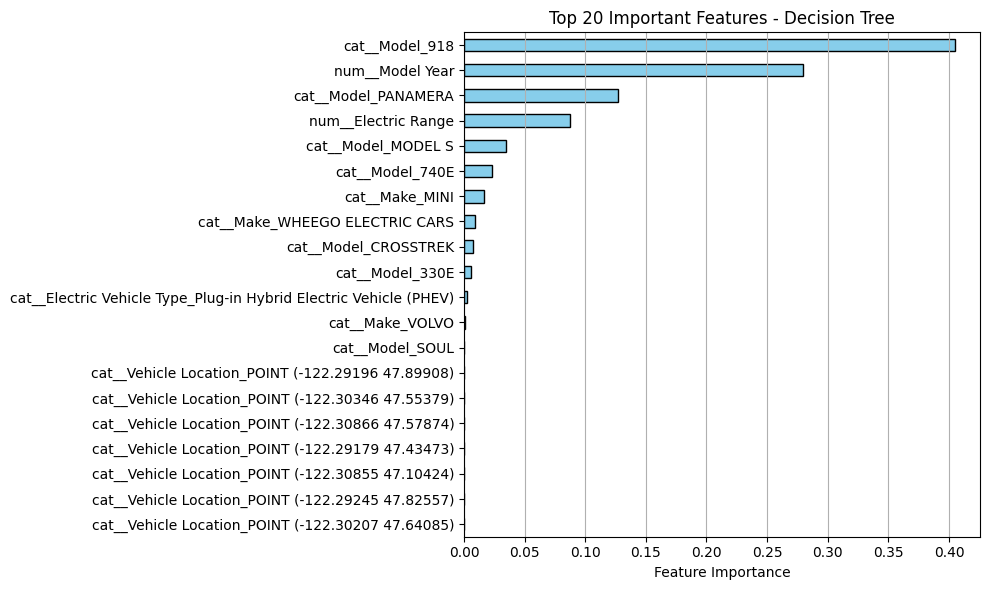

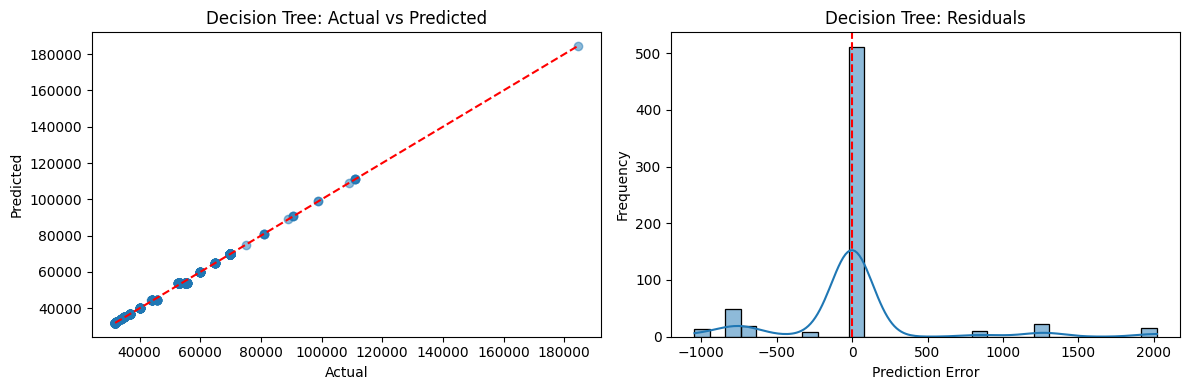

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Postal Code', 'Model Year',
                                                    'Electric Range',
                                                    'Legislative District',
                                                    '2020 Census Tract']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['County', 'City', 'State',
                                                    'Make', 'Model',
                                                    'Electric Vehicle Type',
                                                    'Clean Alternative Fuel '
                                                    'Vehicle (CAFV) Eligibility',
                                                    'V

In [ ]:
# Train and evaluate a Decision Tree Regressor, and visualize the most important features used for prediction.

decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, random_state=42))
])

evaluate_and_plot_model(
    model_pipeline=decision_tree_model,
    name="Decision Tree",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    result_list=results_msrp,
    show_importances=True  
)


Random Forest Evaluation Metrics:
R² Score: 1.0000
MAE: 3.76
RMSE: 92.53


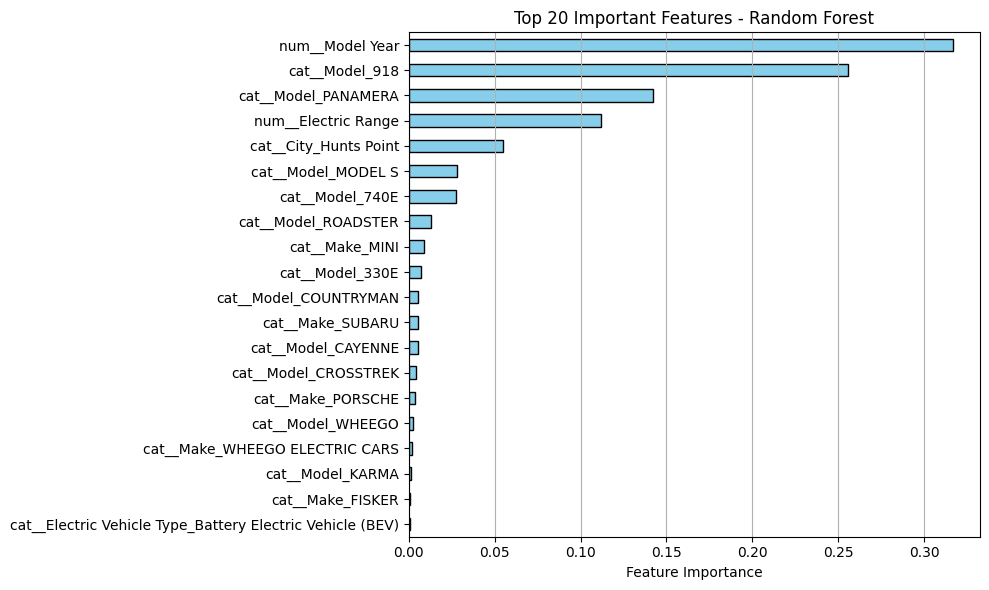

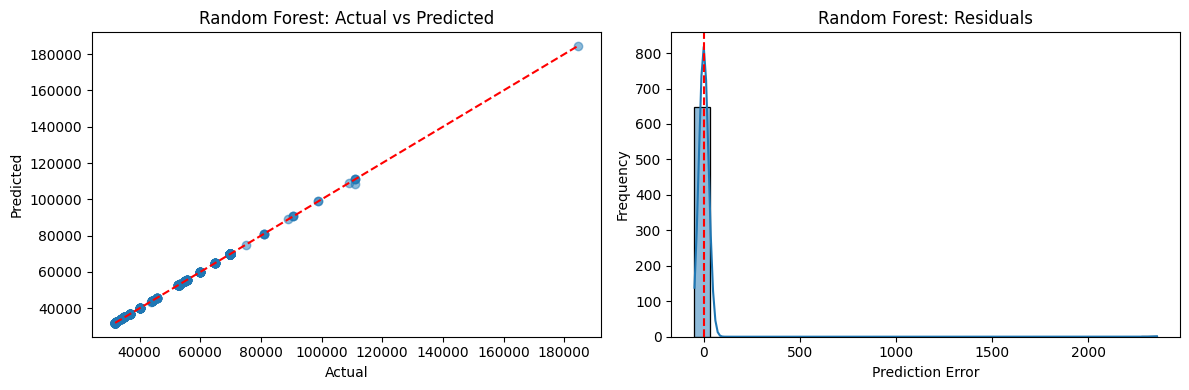

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Postal Code', 'Model Year',
                                                    'Electric Range',
                                                    'Legislative District',
                                                    '2020 Census Tract']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['County', 'City', 'State',
                                                    'Make', 'Model',
                                                    'Electric Vehicle Type',
                                                    'Clean Alternative Fuel '
                                                    'Vehicle (CAFV) Eligibility',
                                                    'V

In [ ]:
# Train and evaluate a Random Forest model while visualizing the top features that influenced its predictions.

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42))
])

evaluate_and_plot_model(
    model_pipeline=random_forest_model,
    name="Random Forest",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    result_list=results_msrp,
    show_importances=True  
)


Gradient Boosting Evaluation Metrics:
R² Score: 0.9996
MAE: 97.87
RMSE: 331.95


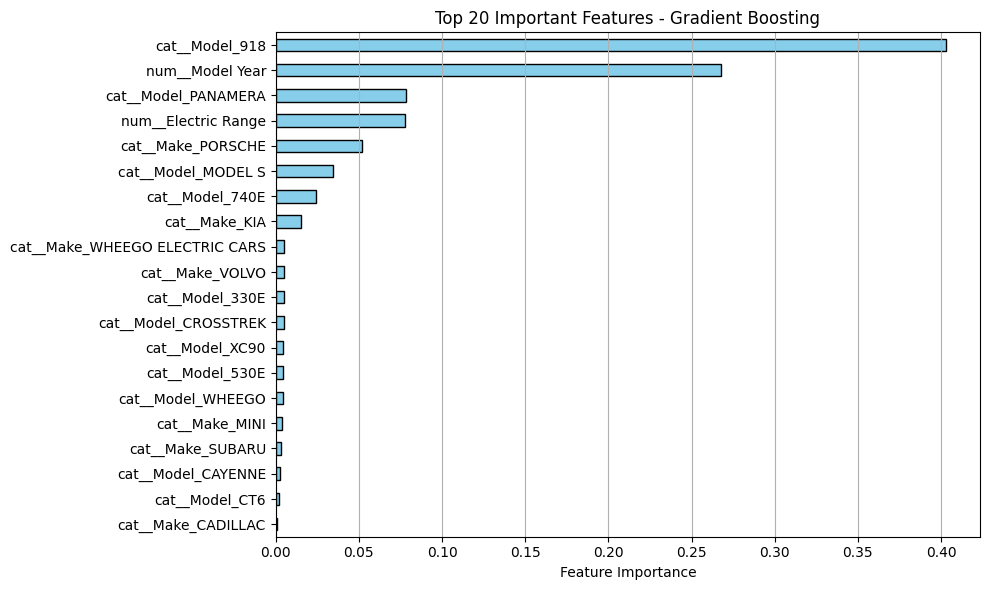

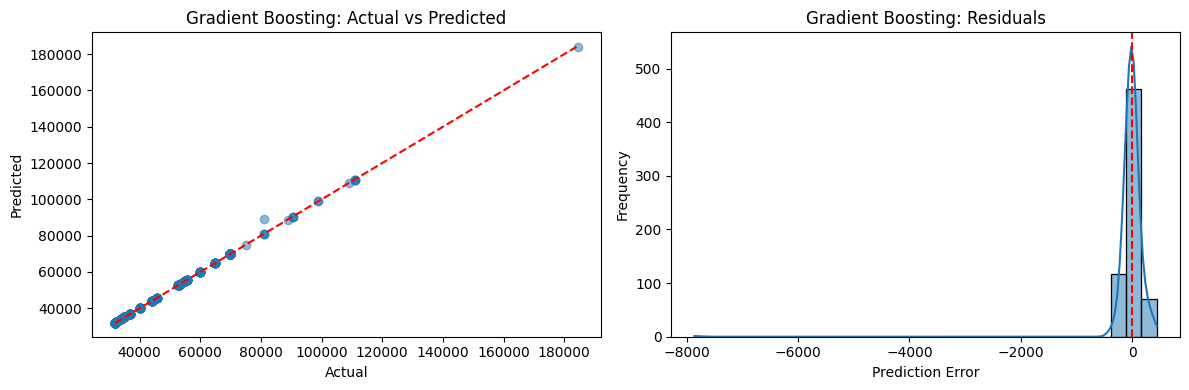

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Postal Code', 'Model Year',
                                                    'Electric Range',
                                                    'Legislative District',
                                                    '2020 Census Tract']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['County', 'City', 'State',
                                                    'Make', 'Model',
                                                    'Electric Vehicle Type',
                                                    'Clean Alternative Fuel '
                                                    'Vehicle (CAFV) Eligibility',
                                                    'V

In [ ]:
# Train and evaluate a Gradient Boosting model, and visualize the top features driving its predictions.

gradient_boosting_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ))
])

evaluate_and_plot_model(
    model_pipeline=gradient_boosting_model,
    name="Gradient Boosting",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    result_list=results_msrp,
    show_importances=True  
)


SVR Evaluation Metrics:
R² Score: 0.9107
MAE: 946.40
RMSE: 5125.91


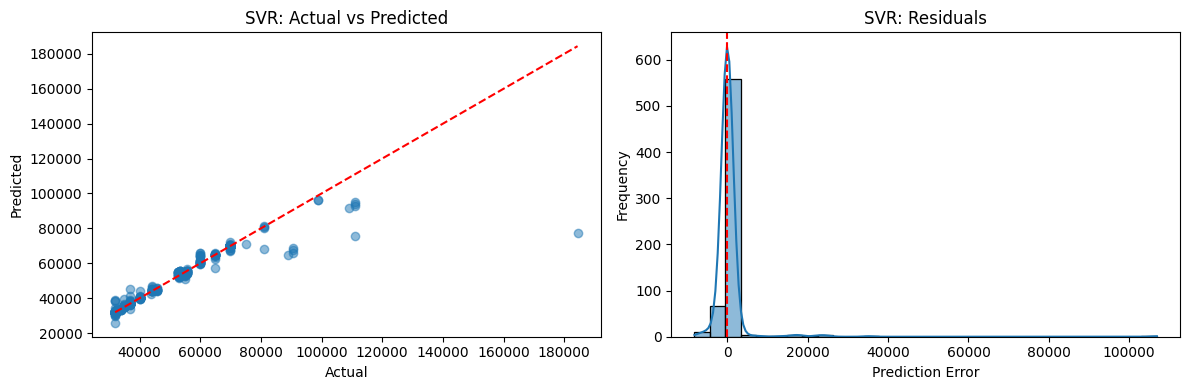

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Postal Code', 'Model Year',
                                                    'Electric Range',
                                                    'Legislative District',
                                                    '2020 Census Tract']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['County', 'City', 'State',
                                                    'Make', 'Model',
                                                    'Electric Vehicle Type',
                                                    'Clean Alternative Fuel '
                                                    'Vehicle (CAFV) Eligibility',
                                                    'V

In [ ]:
# Train and evaluate an SVR model with a high C value and RBF kernel to capture nonlinear relationships.

svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(C=10000, kernel='rbf'))
])

evaluate_and_plot_model(
    model_pipeline=svr_model,
    name="SVR",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    result_list=results_msrp
)

In [ ]:
# Create a sorted DataFrame of all model evaluation metrics to compare performance at a glance.

results_df = pd.DataFrame(results_msrp)
results_df.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,MAE,RMSE
4,Random Forest,0.999971,3.761769,92.526058
5,Gradient Boosting,0.999625,97.872320,331.951272
3,Decision Tree,0.999153,209.984030,499.108412
1,Lasso Regression,0.996760,683.226036,976.204646
0,Linear Regression,0.996643,696.747537,993.613432
2,Ridge Regression,0.990813,927.290451,1643.813969
6,SVR,0.910664,946.402209,5125.908244


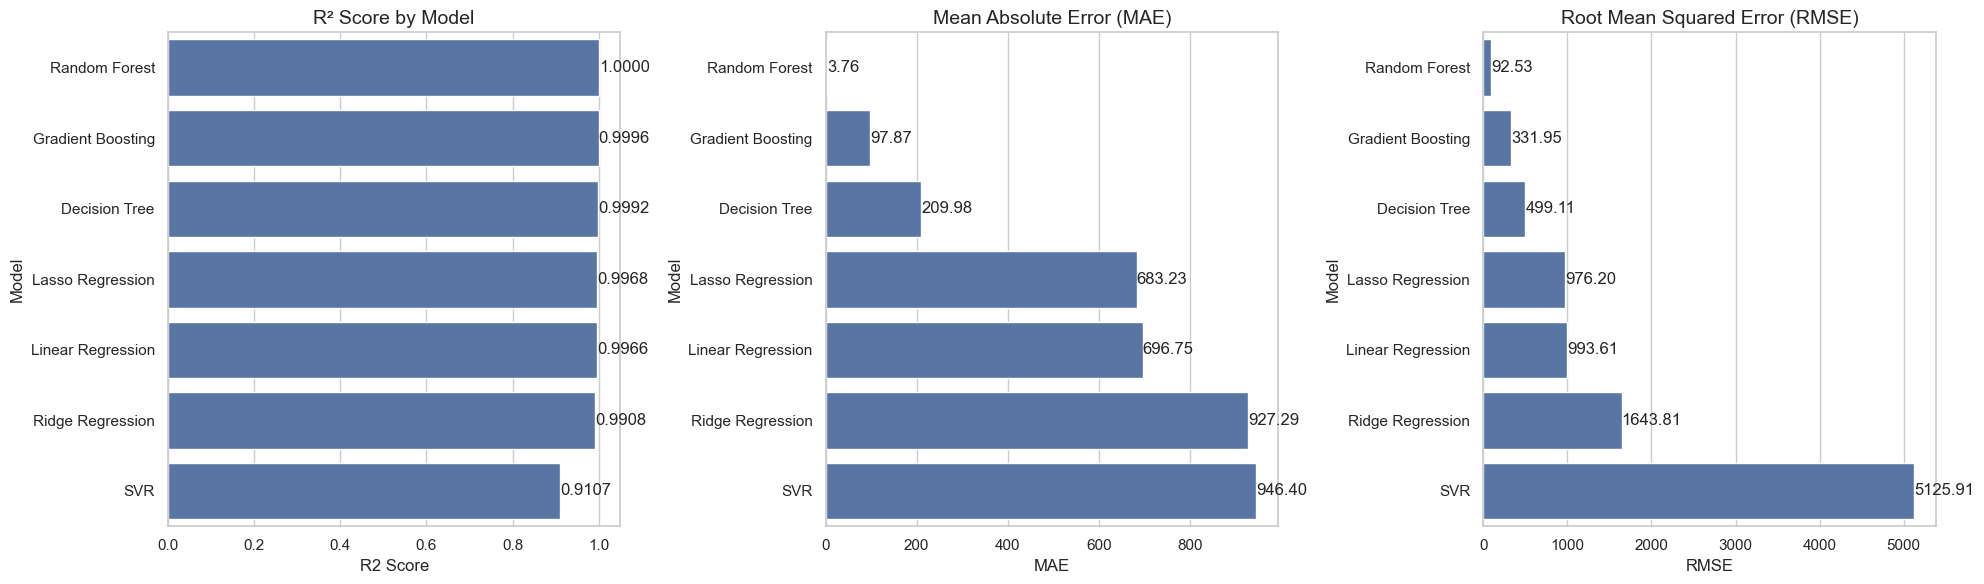

In [ ]:
# Plot side-by-side bar charts comparing R², MAE, and RMSE across all models for visual performance comparison.

plot_df = results_df.drop_duplicates(subset='Model')
plot_df = plot_df.sort_values(by="R2 Score", ascending=False)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) 
sns.barplot(x="R2 Score", y="Model", data=plot_df, ax=axes[0])
axes[0].set_title("R² Score by Model", fontsize=14)
axes[0].bar_label(axes[0].containers[0], fmt="%.4f")
sns.barplot(x="MAE", y="Model", data=plot_df, ax=axes[1])
axes[1].set_title("Mean Absolute Error (MAE)", fontsize=14)
axes[1].bar_label(axes[1].containers[0], fmt="%.2f")
sns.barplot(x="RMSE", y="Model", data=plot_df, ax=axes[2])
axes[2].set_title("Root Mean Squared Error (RMSE)", fontsize=14)
axes[2].bar_label(axes[2].containers[0], fmt="%.2f")
plt.tight_layout()
plt.show()


In [ ]:
# Manually create a small DataFrame with two EV records to test the model on new input data.

sample_data = pd.DataFrame({
    'County': ['King', 'Thurston'],
    'City': ['Seattle', 'Olympia'],
    'State': ['WA', 'WA'],
    'Postal Code': [98101, 98501],
    'Model Year': [2022, 2018],
    'Make': ['TESLA', 'NISSAN'],
    'Model': ['MODEL S', 'LEAF'],
    'Electric Vehicle Type': ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'],
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': ['Clean Alternative Fuel Vehicle Eligible']*2,
    'Electric Range': [250.0, 100.0],
    'Base MSRP': [69900.0, 31950.0], 
    'Legislative District': [43.0, 22.0],
    'Vehicle Location': ['POINT (-122.33 47.60)', 'POINT (-122.90 47.04)'],
    'Electric Utility': ['PUGET SOUND ENERGY INC', 'PUGET SOUND ENERGY INC'],
    '2020 Census Tract': [5.306701e10, 5.306701e10]
})


In [ ]:
# Drop the actual MSRP values so the model can predict them instead.

sample_data = sample_data.drop(columns=['Base MSRP'], errors='ignore')

In [ ]:
# Use the trained Random Forest model to predict MSRP values for the sample EVs.

sample_predictions = random_forest_model.predict(sample_data)
print("Predicted MSRP values:\n", sample_predictions)

Predicted MSRP values:
 [35660.3  35775.45]


Predicting the Ev Range 


In [ ]:
# Load the dataset and clean it by dropping unused columns and replacing 0 values in target columns with NaN.

ev_range_df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
ev_range_df = ev_range_df.drop(columns=['VIN (1-10)', 'DOL Vehicle ID'], errors='ignore')

ev_range_df['Electric Range'] = ev_range_df['Electric Range'].replace(0, np.nan)
ev_range_df['Base MSRP'] = ev_range_df['Base MSRP'].replace(0, np.nan)

ev_range_df = ev_range_df.dropna(subset=['Electric Range', 'Base MSRP'])
ev_range_df = ev_range_df.dropna()

In [ ]:
# Separate input features (X) and the target variable (Electric Range) for modeling.

X_range = ev_range_df.drop(columns=['Electric Range'])  
y_range = ev_range_df['Electric Range']                 


In [ ]:
# Split the features and target into training and test sets for Electric Range prediction.

X_train, X_test, y_train_range, y_test_range = train_test_split(
    X_range, y_range, test_size=0.2, random_state=42
)

In [ ]:
# Identify categorical and numerical columns and define preprocessing steps for scaling and encoding.

categorical_cols = X_range.select_dtypes(include='object').columns.tolist()
numerical_cols = X_range.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [ ]:
# Define a function to evaluate a regression model using R², MAE, RMSE and show a scatter plot of predictions vs actuals.

def evaluate_show_plot(y_true, y_pred, title="Model Evaluation"):
    print(f"{title} Evaluation Metrics:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"{title}: Actual vs. Predicted")
    plt.tight_layout()
    plt.show()

In [ ]:
# Set up a dictionary of regression models (with optional hyperparameter grids) for predicting Electric Range.

models_range = {
    "Linear Regression": (
        LinearRegression(),
        {}
    ),
    "Lasso Regression": (
        Lasso(max_iter=10000),
        {"regressor__alpha": [0.01, 0.1, 1, 10]}
    ),
    "Ridge Regression": (
        Ridge(),
        {"regressor__alpha": [0.01, 0.1, 1, 10]}
    ),
    "Decision Tree": (
        DecisionTreeRegressor(random_state=42),
        {"regressor__max_depth": [5, 10, 20]}
    )
}


In [ ]:
# Iterate through each model, perform GridSearchCV with preprocessing, and store R², MAE, RMSE, and best parameters.

results_range = []

for name, (regressor, params) in models_range.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    grid = GridSearchCV(pipe, params, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train_range)
    y_pred = grid.predict(X_test)

    results_range.append({
        'Model': name,
        'R2 Score': r2_score(y_test_range, y_pred),
        'MAE': mean_absolute_error(y_test_range, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_range, y_pred)),
        'Best Params': grid.best_params_
    })

In [ ]:
# Convert stored results into a sorted DataFrame and print a final summary of model performances.

summary_df = pd.DataFrame(results_range).sort_values(by='R2 Score', ascending=False)
print("Final Electric Range Prediction Summary:")
display(summary_df)


Final Electric Range Prediction Summary:


,Model,R2 Score,MAE,RMSE,Best Params
3,Decision Tree,1.000000,0.000000,0.000000,{'regressor__max_depth': 10}
0,Linear Regression,0.995325,3.514502,6.168106,{}
1,Lasso Regression,0.989041,4.906823,9.443428,{'regressor__alpha': 0.1}
2,Ridge Regression,0.988828,5.717510,9.534836,{'regressor__alpha': 10}


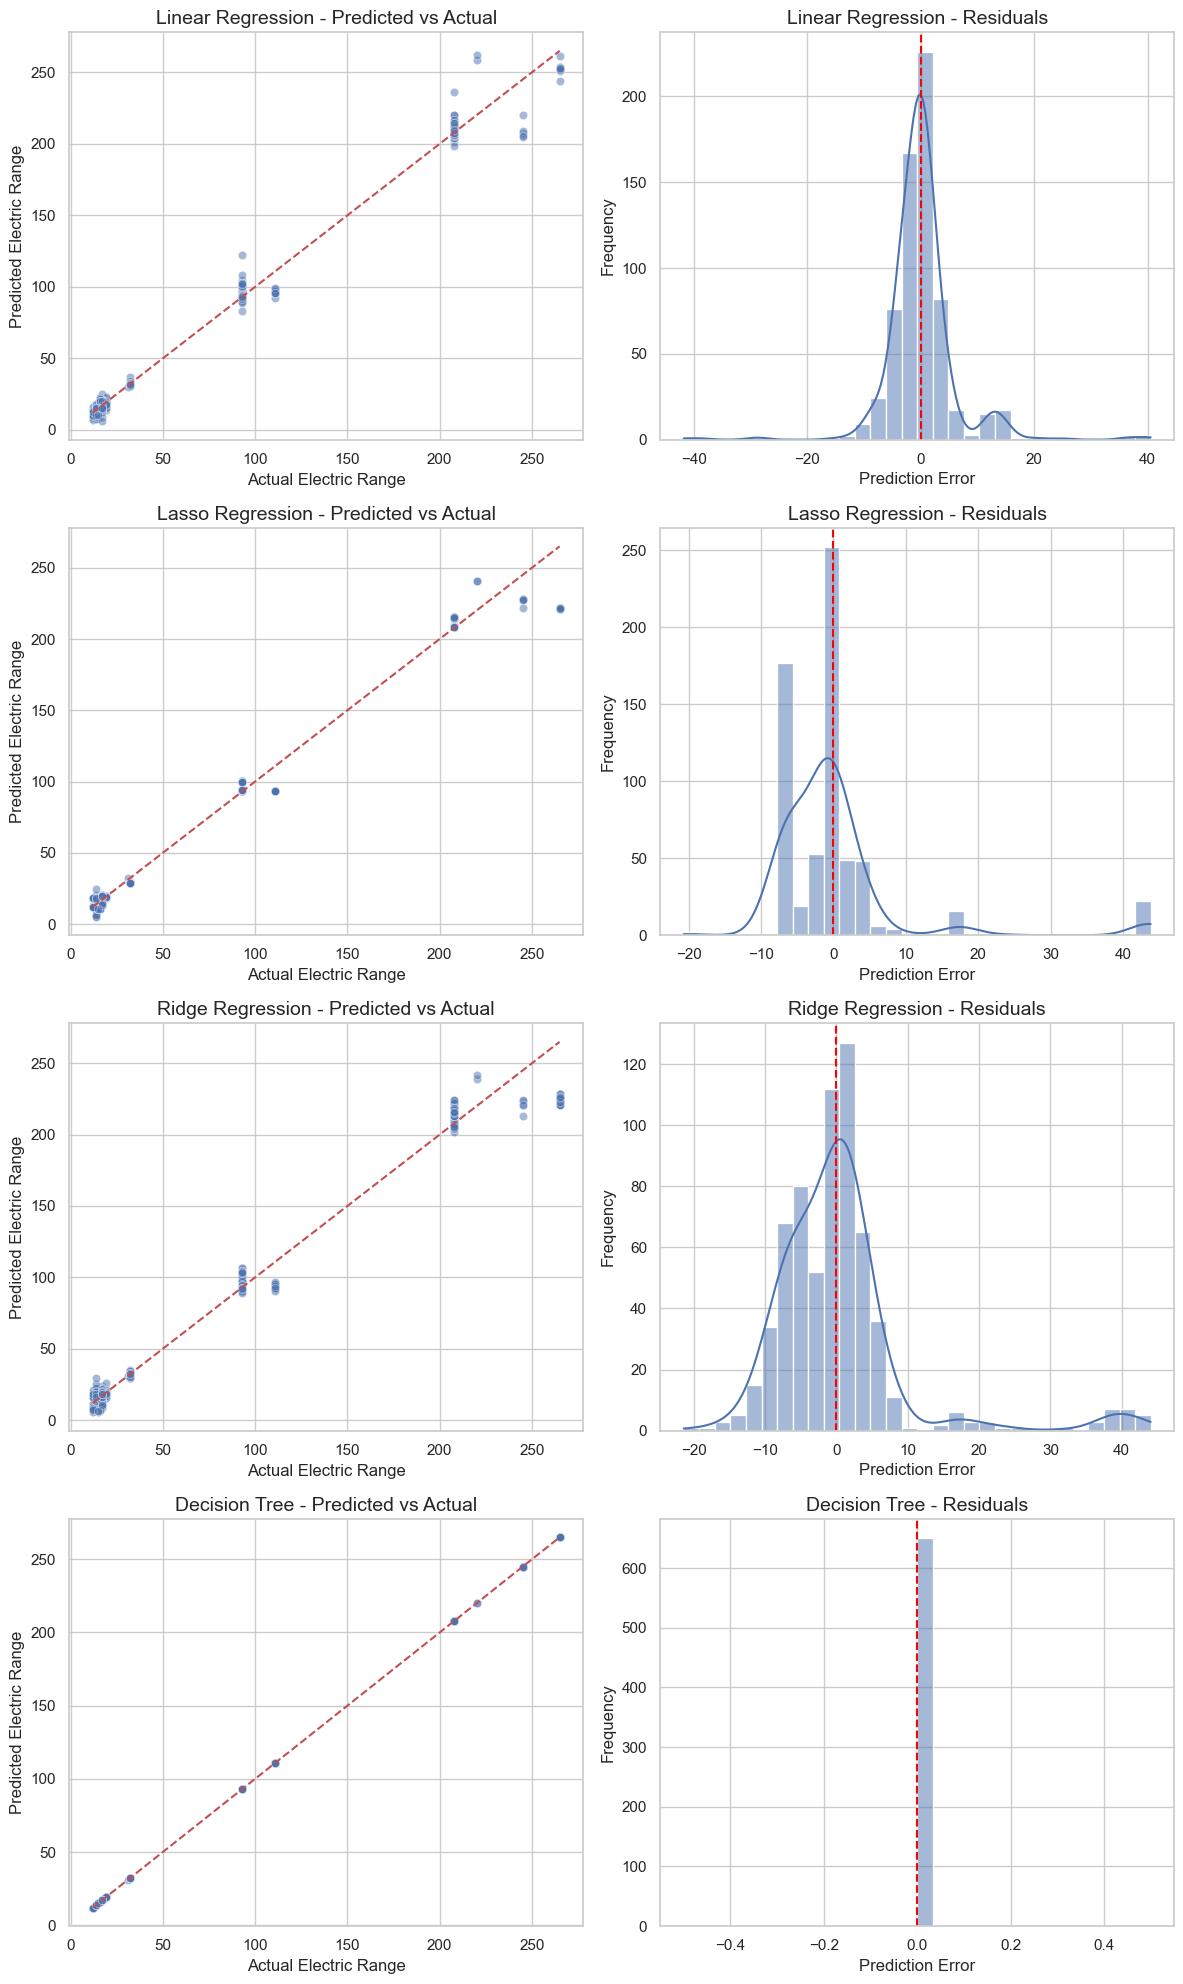

In [ ]:
# Loop through each model, apply best parameters, retrain, and plot Actual vs Predicted and Residuals for Electric Range.

fig, axes = plt.subplots(len(results_range), 2, figsize=(12, 5 * len(results_range)))
sns.set(style="whitegrid")

if len(results_range) == 1:
    axes = [axes]

for idx, result in enumerate(results_range):
    model_name = result['Model']
    regressor, _ = models_range[model_name]

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    if isinstance(result['Best Params'], dict) and result['Best Params'] != {}:
        pipe.set_params(**result['Best Params'])

    pipe.fit(X_train, y_train_range)
    y_pred = pipe.predict(X_test)
    residuals = y_test_range - y_pred

    # Plot 1: Actual vs Predicted
    sns.scatterplot(x=y_test_range, y=y_pred, ax=axes[idx][0], alpha=0.5)
    axes[idx][0].plot([y_test_range.min(), y_test_range.max()],
                      [y_test_range.min(), y_test_range.max()], 'r--')
    axes[idx][0].set_title(f"{model_name} - Predicted vs Actual", fontsize=14)
    axes[idx][0].set_xlabel("Actual Electric Range")
    axes[idx][0].set_ylabel("Predicted Electric Range")

    #Plot 2: Residuals
    sns.histplot(residuals, bins=30, kde=True, ax=axes[idx][1])
    axes[idx][1].axvline(0, color='red', linestyle='--')
    axes[idx][1].set_title(f"{model_name} - Residuals", fontsize=14)
    axes[idx][1].set_xlabel("Prediction Error")
    axes[idx][1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
def store_results_range(results_list, model_name, y_true, y_pred, best_params="Default"):
    results_list.append({
        'Model': model_name,
        'R2 Score': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'Best Params': best_params
    })

Linear Regression (Range) Evaluation Metrics:
R² Score: 0.99532478810097
MAE: 3.5145018668379997
RMSE: 6.1681059989156


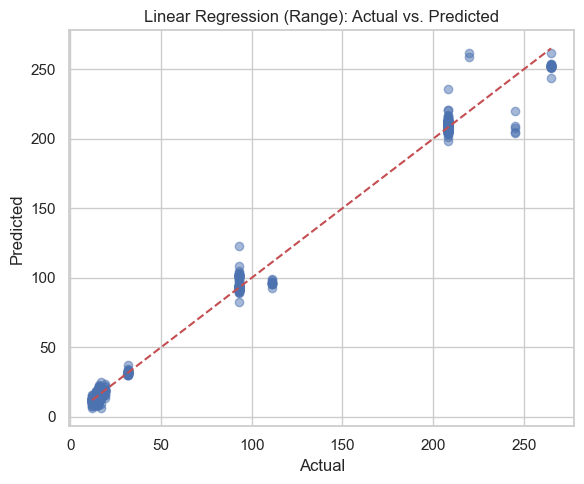

In [ ]:
# Fit and evaluate a Linear Regression model on Electric Range, display metrics, and store results with optional best params.

lr_range_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_range_model.fit(X_train, y_train_range)
y_pred_range = lr_range_model.predict(X_test)
evaluate_show_plot(y_test_range, y_pred_range, "Linear Regression (Range)")
store_results_range(results_range, "Linear Regression (Range)", y_test_range, y_pred_range)

Lasso Regression (Range) Evaluation Metrics:
R² Score: 0.9890413522811425
MAE: 4.906822999616875
RMSE: 9.443427745209794


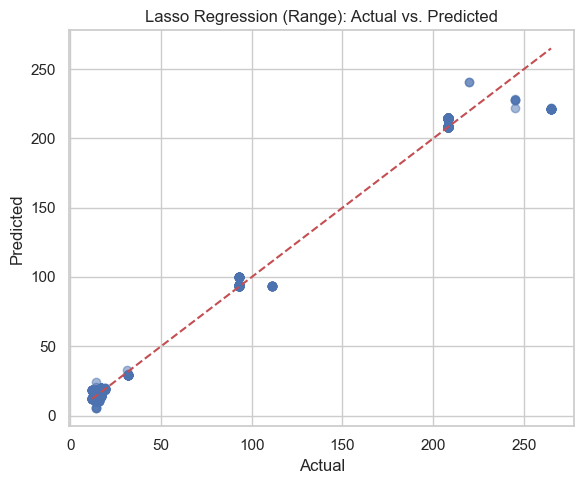

In [ ]:
# Trains a Lasso regression model on the electric range data, evaluates its performance with metrics and plots, then stores the results for summary comparison.

lasso_range_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))
])

lasso_range_model.fit(X_train, y_train_range)
y_pred_range_lasso = lasso_range_model.predict(X_test)

evaluate_show_plot(y_test_range, y_pred_range_lasso, "Lasso Regression (Range)")
store_results_range(results_range, "Lasso Regression (Range)", y_test_range, y_pred_range_lasso)


Ridge Regression (Range) Evaluation Metrics:
R² Score: 0.9886279787375815
MAE: 5.779479210747325
RMSE: 9.619887875999952


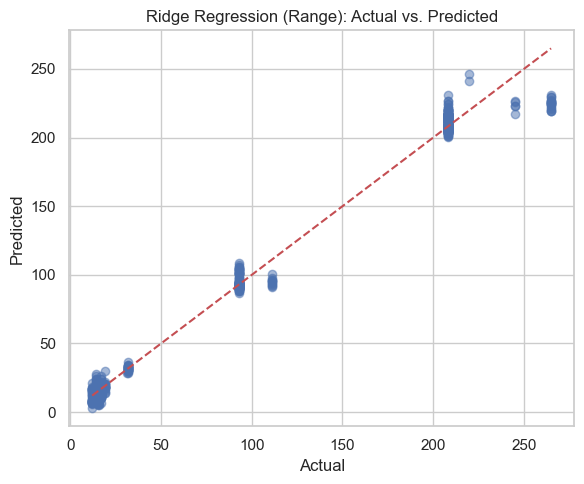

In [ ]:
# Trains a Ridge regression model on electric range data, evaluates its predictions, and logs the performance metrics and parameters.

ridge_range_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_range_model.fit(X_train, y_train_range)
y_pred_range_ridge = ridge_range_model.predict(X_test)

evaluate_show_plot(y_test_range, y_pred_range_ridge, "Ridge Regression (Range)")
store_results_range(results_range, "Ridge Regression (Range)", y_test_range, y_pred_range_ridge)

Decision Tree (Range) Evaluation Metrics:
R² Score: 1.0
MAE: 0.0
RMSE: 0.0


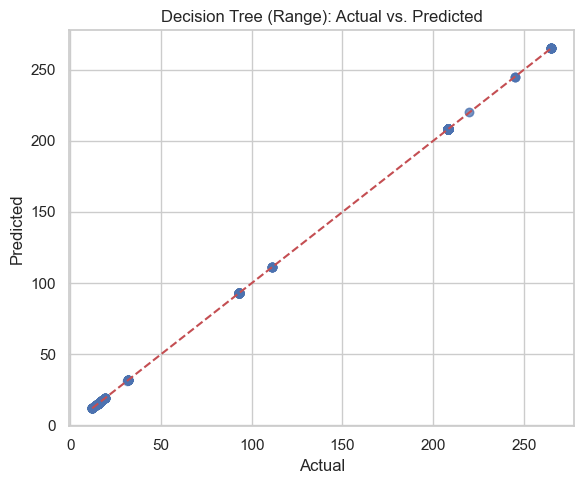

In [ ]:
# Trains a Decision Tree model on electric range data and evaluates it, showing perfect performance likely due to overfitting.

dt_range_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dt_range_model.fit(X_train, y_train_range)
y_pred_range_dt = dt_range_model.predict(X_test)

evaluate_show_plot(y_test_range, y_pred_range_dt, "Decision Tree (Range)")
store_results_range(results_range, "Decision Tree (Range)", y_test_range, y_pred_range_dt)


Random Forest (Range) Evaluation Metrics:
R² Score: 0.9999999987900589
MAE: 0.00012307692307692318
RMSE: 0.0031378581622109477


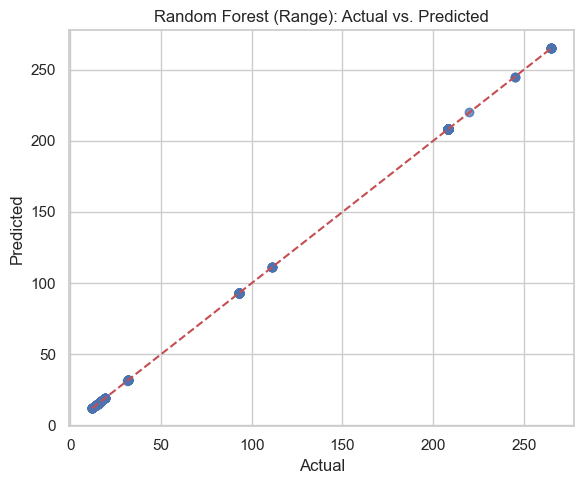

In [ ]:
# Trains a Random Forest model to predict electric range, producing highly accurate results with low error metrics.

rf_range_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_range_model.fit(X_train, y_train_range)
y_pred_range_rf = rf_range_model.predict(X_test)

evaluate_show_plot(y_test_range, y_pred_range_rf, "Random Forest (Range)")
store_results_range(results_range, "Random Forest (Range)", y_test_range, y_pred_range_rf)


Gradient Boosting (Range) Evaluation Metrics:
R² Score: 0.9999992447426452
MAE: 0.04953605084480767
RMSE: 0.07839685852999645


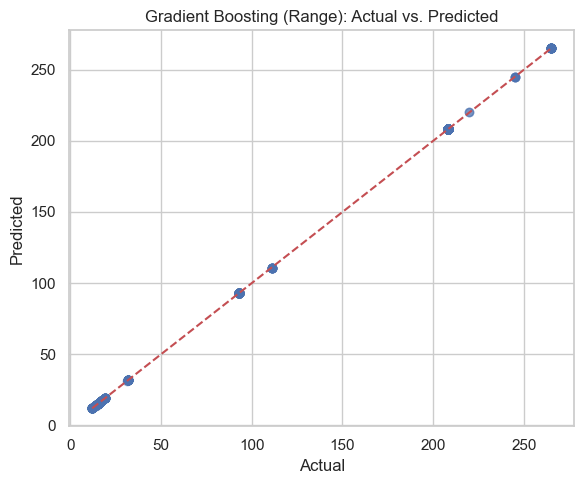

In [ ]:
# Trains a Gradient Boosting Regressor to predict electric range, achieving excellent accuracy and low error through iterative model refinement.

gb_range_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

gb_range_model.fit(X_train, y_train_range)
y_pred_range_gb = gb_range_model.predict(X_test)

evaluate_show_plot(y_test_range, y_pred_range_gb, "Gradient Boosting (Range)")
store_results_range(results_range, "Gradient Boosting (Range)", y_test_range, y_pred_range_gb)


SVR (Range) Evaluation Metrics:
R² Score: 0.953820607345545
MAE: 10.889839635535733
RMSE: 19.38542322769049


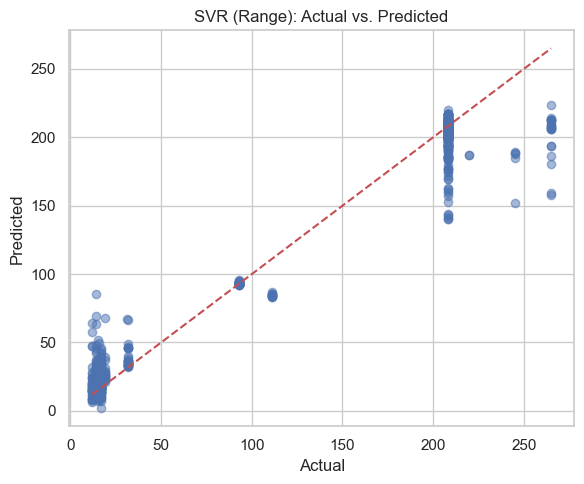

In [ ]:
# Uses Support Vector Regression with RBF kernel to predict electric range, delivering high accuracy with slightly higher error than ensemble tree-based models.

svr_range_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.2))
])

svr_range_model.fit(X_train, y_train_range)
y_pred_range_svr = svr_range_model.predict(X_test)

evaluate_show_plot(y_test_range, y_pred_range_svr, "SVR (Range)")
store_results_range(results_range, "SVR (Range)", y_test_range, y_pred_range_svr)

In [ ]:
# Filter out models that were used to predict 'Electric Range' only,
# then sort them in descending order by R² Score to identify the best-performing models.

range_only_results = [r for r in results_range if "Range" in r['Model']]
pd.DataFrame(range_only_results).sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,MAE,RMSE,Best Params
3,Decision Tree (Range),1.000000,0.000000,0.000000,Default
4,Random Forest (Range),1.000000,0.000123,0.003138,Default
5,Gradient Boosting (Range),0.999999,0.049536,0.078397,Default
0,Linear Regression (Range),0.995325,3.514502,6.168106,Default
1,Lasso Regression (Range),0.989041,4.906823,9.443428,Default
2,Ridge Regression (Range),0.988628,5.779479,9.619888,Default
6,SVR (Range),0.953821,10.889840,19.385423,Default


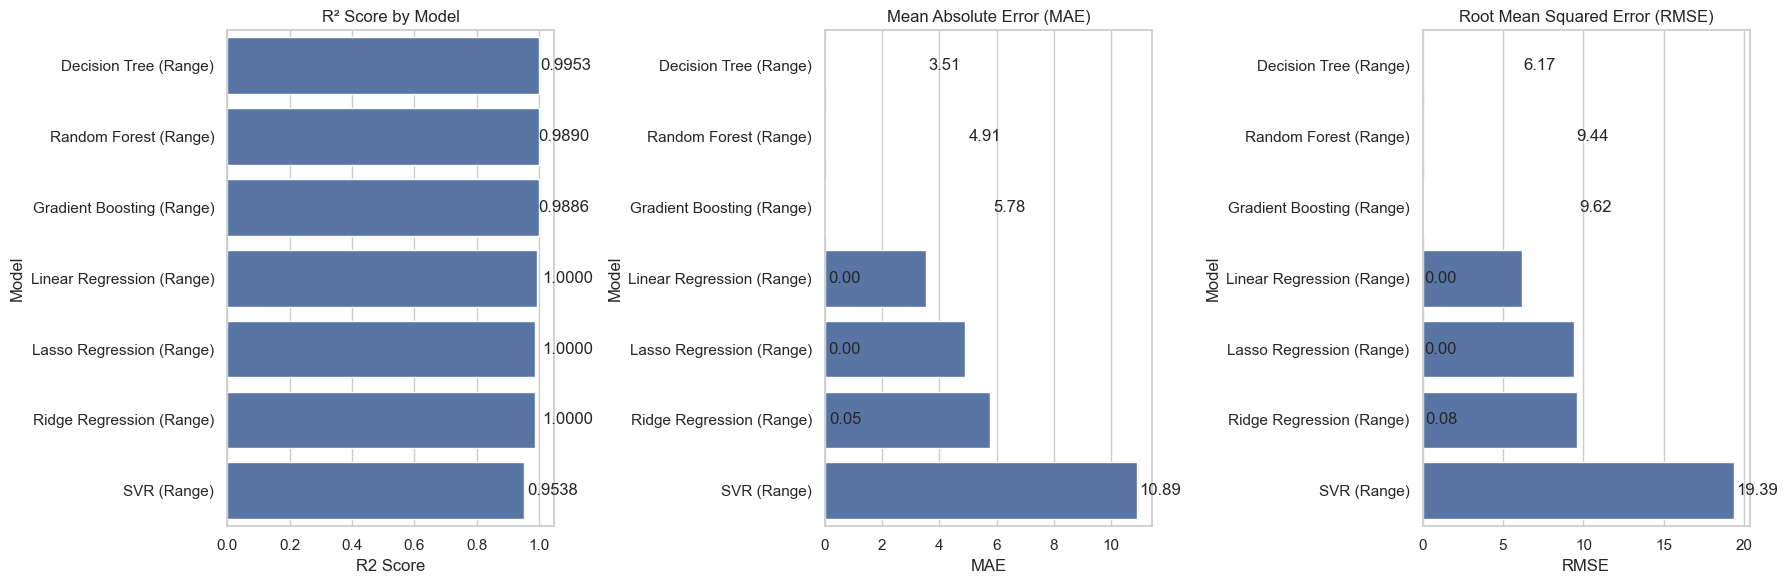

In [ ]:
# Create side-by-side barplots to visually compare R² Score, MAE, and RMSE 


range_only_results = [r for r in results_range if "Range" in r['Model']]
results_range_df = pd.DataFrame(range_only_results).sort_values(by="R2 Score", ascending=False)
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x="R2 Score", y="Model", data=results_range_df, ax=axes[0])
axes[0].set_title("R² Score by Model")
axes[0].set_xlim(0, 1.05)
for i, row in results_range_df.iterrows():
    axes[0].text(row["R2 Score"] + 0.01, i, f'{row["R2 Score"]:.4f}', va='center')

sns.barplot(x="MAE", y="Model", data=results_range_df, ax=axes[1])
axes[1].set_title("Mean Absolute Error (MAE)")
for i, row in results_range_df.iterrows():
    axes[1].text(row["MAE"] + 0.1, i, f'{row["MAE"]:.2f}', va='center')

sns.barplot(x="RMSE", y="Model", data=results_range_df, ax=axes[2])
axes[2].set_title("Root Mean Squared Error (RMSE)")
for i, row in results_range_df.iterrows():
    axes[2].text(row["RMSE"] + 0.1, i, f'{row["RMSE"]:.2f}', va='center')

plt.tight_layout()
plt.show()


In [ ]:
# Predict Electric Range for new vehicle samples using the trained Random Forest model.

sample_range_data = pd.DataFrame({
    'County': ['King', 'Thurston'],
    'City': ['Seattle', 'Olympia'],
    'State': ['WA', 'WA'],
    'Postal Code': [98101, 98501],
    'Model Year': [2022, 2018],
    'Make': ['TESLA', 'NISSAN'],
    'Model': ['MODEL S', 'LEAF'],
    'Electric Vehicle Type': ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'],
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': ['Clean Alternative Fuel Vehicle Eligible']*2,
    'Base MSRP': [69900.0, 31950.0],
    'Legislative District': [43.0, 22.0],
    'Vehicle Location': ['POINT (-122.33 47.60)', 'POINT (-122.90 47.04)'],
    'Electric Utility': ['PUGET SOUND ENERGY INC', 'PUGET SOUND ENERGY INC'],
    '2020 Census Tract': [5.306701e10, 5.306701e10]
})

sample_range_data_clean = sample_range_data.drop(columns=['Electric Range'], errors='ignore')
sample_range_preds = rf_range_model.predict(sample_range_data_clean)
for i, pred in enumerate(sample_range_preds):
    print(f"Sample {i+1} Predicted Electric Range: {pred:.2f} miles")

Sample 1 Predicted Electric Range: 208.00 miles
Sample 2 Predicted Electric Range: 99.20 miles
